In [1]:
import numpy as np
from numpy import meshgrid
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
import pandas as pd
import calendar
from sklearn.linear_model import LinearRegression,LogisticRegression #For Algorithm
from sklearn.model_selection import train_test_split # for Data Validation
from sklearn.metrics import r2_score #for The Evaluation 
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.svm import SVC

In [3]:
df=pd.read_csv('Delhi metro.csv')
print("File Fetched Sucessfully !! ")

File Fetched Sucessfully !! 


In [9]:
df.head(50)

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807
5,6,Major Mohit Sharma,5.7,Red line,08-03-2019,Elevated,28.677611,77.358143
6,7,Raj Bagh,6.9,Red line,08-03-2019,Elevated,28.640860,77.209500
7,8,Shaheed Nagar,8.2,Red line,08-03-2019,Elevated,28.530780,77.212057
8,9,Dilshad Garden,9.4,Red line,04-06-2008,Elevated,28.675920,77.321420
9,10,Jhil Mil,10.3,Red line,04-06-2008,Elevated,28.675790,77.312390


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID (Station ID)               285 non-null    int64  
 1   Station Names                 285 non-null    object 
 2   Dist. From First Station(km)  285 non-null    float64
 3   Metro Line                    285 non-null    object 
 4   Opened(Year)                  285 non-null    object 
 5   Layout                        285 non-null    object 
 6   Latitude                      285 non-null    float64
 7   Longitude                     285 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 17.9+ KB


<Axes: xlabel='Metro Line'>

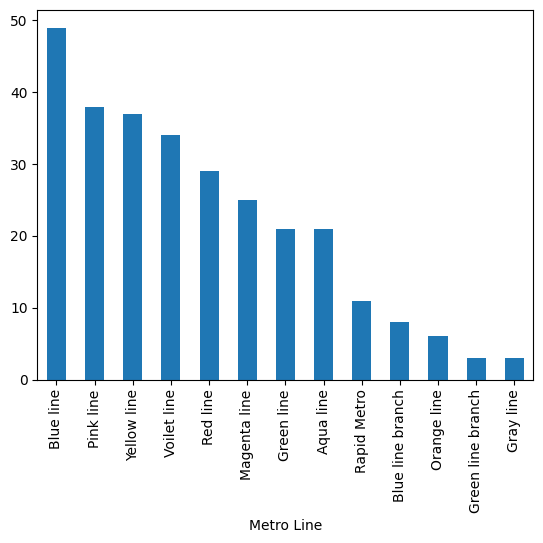

In [10]:
df['Metro Line'].value_counts().plot(kind='bar')

In [18]:
df.head(100)

,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
0,1,Shaheed Sthal(First Station),0.0,Red line,08-03-2019,Elevated,28.670611,77.415582
1,2,Hindon River,1.0,Red line,08-03-2019,Elevated,28.878965,77.415483
2,3,Arthala,2.5,Red line,08-03-2019,Elevated,28.676999,77.391892
3,4,Mohan Nagar,3.2,Red line,08-03-2019,Elevated,28.606319,77.106082
4,5,Shyam park,4.5,Red line,08-03-2019,Elevated,28.698807,28.698807
...,...,...,...,...,...,...,...,...
95,30,Barakhamba,30.8,Blue line,30-12-2005,Underground,28.630030,77.224360
96,31,Mandi House [Conn: Violet],31.8,Blue line,11-11-2006,Underground,28.625880,77.234100
97,32,Supreme Court (Pragati Maidan),32.6,Blue line,11-11-2006,Elevated,28.623420,77.242500
98,33,Indraprastha,33.4,Blue line,11-11-2006,Elevated,28.620510,77.249930


In [ ]:
blue_stations = df[df['Metro Line'] == 'Blue line']  # filter only Blue line
print(blue_stations['Station Names'])


66     Dwarka Sector 21(First station) [Conn: Orange]
67                                    Dwarka Sector 8
68                                    Dwarka Sector 9
69                                   Dwarka Sector 10
70                                   Dwarka Sector 11
71                                   Dwarka Sector 12
72                                   Dwarka Sector 13
73                                   Dwarka Sector 14
74                                Dwarka [Conn: Gray]
75                                         Dwarka Mor
76                                             Nawada
77                                   Uttam Nagar West
78                                   Uttam Nagar East
79                    Janak Puri West [Conn: Magenta]
80                                    Janak Puri East
81                                        Tilak Nagar
82                                      Subhash Nagar
83                                      Tagore Garden
84                        Ra

In [ ]:
df[df['Station Names'] == 'Jhandewalan']


,ID (Station ID),Station Names,Dist. From First Station(km),Metro Line,Opened(Year),Layout,Latitude,Longitude
92,27,Jhandewalan,27.9,Blue line,30-12-2005,Elevated,28.64427,77.19988


In [25]:
df['Opened(Year)'].value_counts()


Opened(Year)
30-12-2005    22
25-01-2019    21
31-10-2018    16
29-05-2018    16
02-04-2010    15
14-03-2018    13
03-10-2010    13
12-11-2009    10
06-09-2015     9
21-06-2010     9
25-12-2017     9
03-09-2010     8
08-03-2019     8
31-03-2004     7
24-06-2018     7
03-07-2005     6
01-04-2006     6
06-08-2018     6
06-01-2010     5
04-02-2009     5
09-03-2019     5
14-11-2013     5
31-12-2018     4
20-12-2004     4
25-12-2002     4
23-02-2011     4
03-10-2003     4
28-05-2017     4
10-11-2015     3
04-06-2008     3
04-10-2019     3
14-01-2011     3
31-03-2017     3
11-11-2006     3
30-10-2010     2
24-12-2002     2
26-06-2014     2
19-11-2018     2
10-05-2009     2
14-07-2011     2
15-08-2011     2
25-04-2017     2
26-08-2010     1
02-09-2010     1
07-05-2014     1
27-08-2011     1
24-08-2011     1
08-06-2015     1
Name: count, dtype: int64

In [26]:
df['Launch Year'] = pd.to_datetime(df['Opened(Year)'], errors='coerce', dayfirst=True).dt.year


<Axes: xlabel='Launch Year'>

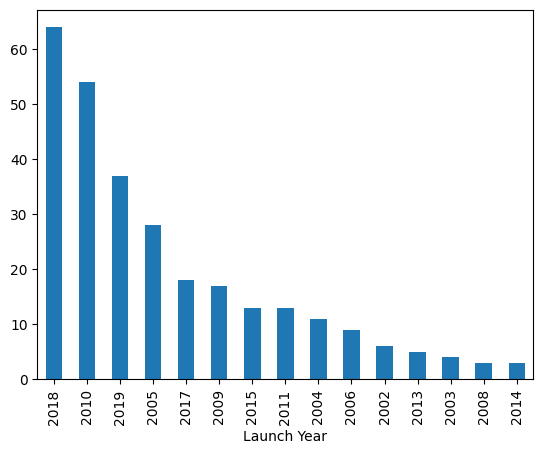

In [27]:
df['Launch Year'].value_counts().plot(kind='bar')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID (Station ID)               285 non-null    int64  
 1   Station Names                 285 non-null    object 
 2   Dist. From First Station(km)  285 non-null    float64
 3   Metro Line                    285 non-null    object 
 4   Opened(Year)                  285 non-null    object 
 5   Layout                        285 non-null    object 
 6   Latitude                      285 non-null    float64
 7   Longitude                     285 non-null    float64
 8   Launch Year                   285 non-null    int32  
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 19.1+ KB


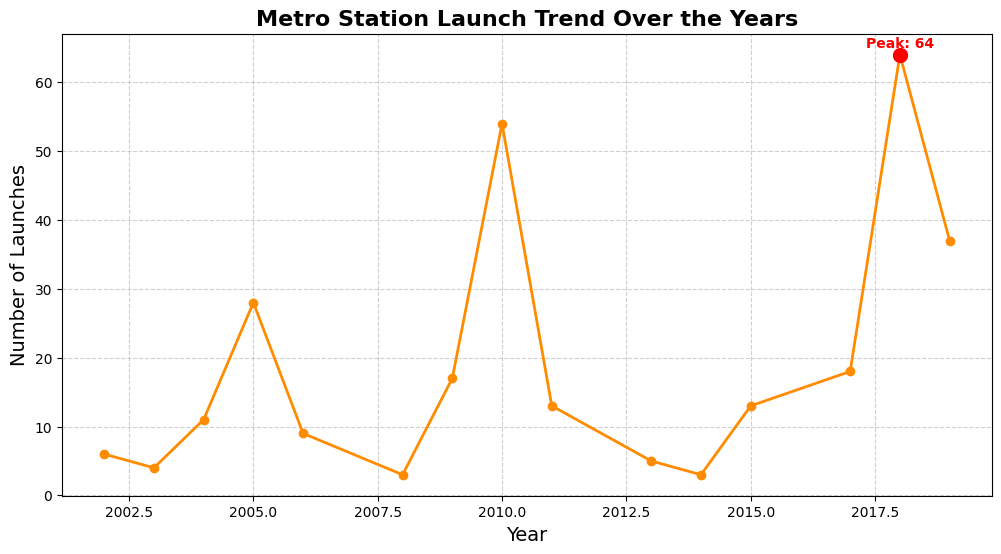

In [32]:
launch_counts = df['Launch Year'].value_counts().sort_index()

plt.figure(figsize=(12,6))
plt.plot(launch_counts.index, launch_counts.values, marker='o', linewidth=2, color='darkorange')

plt.title('Metro Station Launch Trend Over the Years', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)

# Highlight max year
max_year = launch_counts.idxmax()
max_value = launch_counts.max()
plt.scatter(max_year, max_value, color='red', s=100, zorder=5)
plt.text(max_year, max_value+1, f'Peak: {max_value}', ha='center', fontsize=10, fontweight='bold', color='red')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


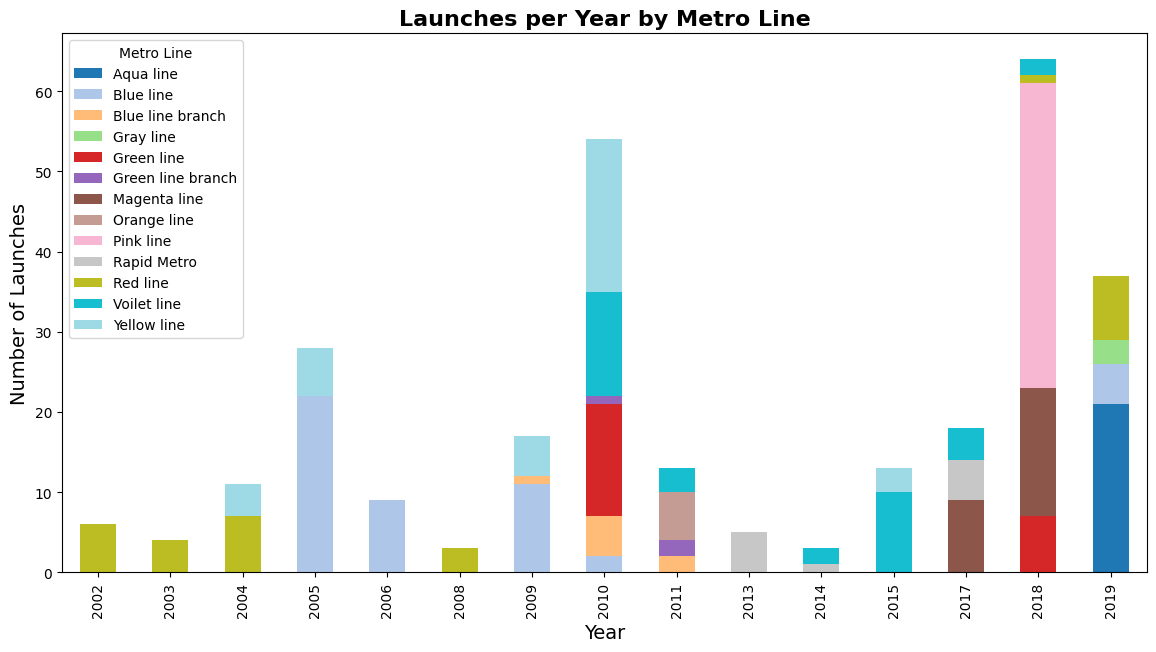

In [33]:
line_year = df.groupby(['Launch Year', 'Metro Line']).size().unstack(fill_value=0)

line_year.plot(kind='bar', stacked=True, figsize=(14,7), cmap='tab20')
plt.title('Launches per Year by Metro Line', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Launches', fontsize=14)
plt.legend(title='Metro Line')
plt.show()


In [34]:
busy_station = df['Station Names'].value_counts().idxmax()
count = df['Station Names'].value_counts().max()

print(f"Most frequent (possibly busiest) station: {busy_station} with {count} entries")


Most frequent (possibly busiest) station: Ashok Park Main with 2 entries


In [35]:
# Find station closest to mean distance
central_station = df.iloc[(df['Dist. From First Station(km)'] - 
                            df['Dist. From First Station(km)'].mean()).abs().argsort()[:1]]

print("Central station (distance-based):")
print(central_station[['Station Names', 'Dist. From First Station(km)']])


Central station (distance-based):
                         Station Names  Dist. From First Station(km)
46  Central Secretariat [Conn: Violet]                          19.4


In [36]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

coords = df[['Latitude', 'Longitude']]
nbrs = NearestNeighbors(n_neighbors=6).fit(coords)  # 5 nearest neighbors
distances, _ = nbrs.kneighbors(coords)

# Average distance to neighbors (smaller = busier area)
df['avg_neighbor_dist'] = distances[:,1:].mean(axis=1)

busiest_geo = df.loc[df['avg_neighbor_dist'].idxmin(), ['Station Names','avg_neighbor_dist']]
print("Geographically busiest station (most clustered):")
print(busiest_geo)


Geographically busiest station (most clustered):
Station Names        Noida Sector 34
avg_neighbor_dist                0.0
Name: 110, dtype: object
